# Integração das equações de movimento

In [1]:
from Eq_freqD import *
from background import solve_TOV
from constants import *
from sympy import *
import matplotlib.pyplot as plt

In [2]:
pc = 5
file_eos = "apr.csv"

R = solve_TOV(file_eos, pc, 0.0001)[0]
R

0.144764296875

In [3]:
bkg_func = set_bkg(file_eos, pc)

r=np.linspace(0,R-0.00001,100)
gamma=[]
for i in range(len(r)):
    gamma.append(bkg_func(r[i])[-1])

# Integração Interna

In [4]:
pc = 5
rmatch = R/2
bkg_func = set_bkg(file_eos, pc)
l = 2
omega = 1
r0 = 0.001

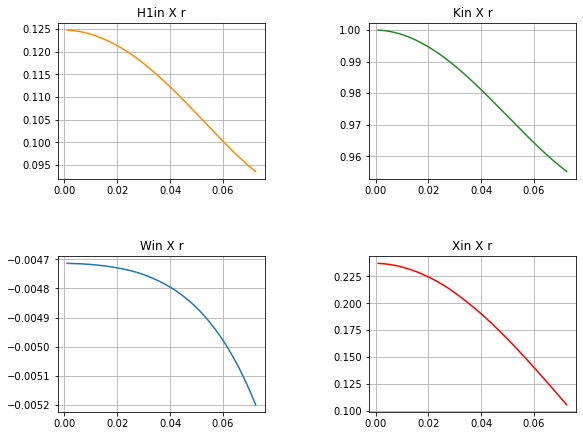

In [5]:
from sympy import *
import matplotlib.pyplot as plt

k0, w0, h1r, kr, wr = match_interior(rmatch, bkg_func, l, omega, file_eos, R, r0)

u1 = np.array(integrate_origin(1, 0, rmatch, bkg_func, l, omega, file_eos, r0)).T
u2 = np.array(integrate_origin(0, 1, rmatch, bkg_func, l, omega, file_eos, r0)).T

H1in = np.array([k0*x + w0*y for x, y in zip(u1[0], u2[0])])
Kin = np.array([k0*x + w0*y for x, y in zip(u1[1], u2[1])])
Win = np.array([k0*x + w0*y for x, y in zip(u1[2], u2[2])])
Xin = np.array([k0*x + w0*y for x, y in zip(u1[3], u2[3])])


n = len(H1in)

rin = np.linspace(r0, rmatch, n)

fig = plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.title("H1in X r")
plt.plot(rin, H1in, color = "darkorange")
plt.grid()

plt.subplot(2,2,2)
plt.title("Kin X r")
plt.plot(rin, Kin, color = "forestgreen")
plt.grid()

plt.subplot(2,2,3)
plt.title("Win X r")
plt.plot(rin, Win)
plt.grid()

plt.subplot(2,2,4)
plt.title("Xin X r")
plt.plot(rin, Xin, color = "red")
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1, wspace=0.5, hspace=0.5)

plt.show()

# Integração Externa

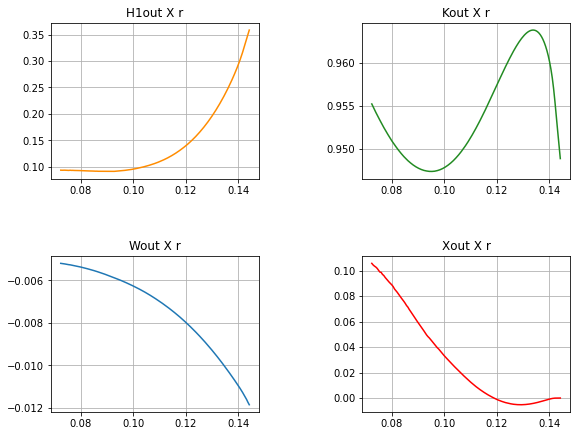

In [6]:
from sympy import *
import matplotlib.pyplot as plt

#k0, w0, h1r, kr, wr = match_interior(rmatch, bkg_func, l, omega, file_eos, R, r0, metodoin, metodoout)

u3 = integrate_surface(1, 0, 0, rmatch, bkg_func, l, omega, R)
u4 = integrate_surface(0, 1, 0, rmatch, bkg_func, l, omega, R)
u5 = integrate_surface(0, 0, 1, rmatch, bkg_func, l, omega, R)

H1out = np.array([h1r*x + kr*y + wr*z for x, y, z in zip(u3.T[0], u4.T[0], u5.T[0])])
Kout = np.array([h1r*x + kr*y + wr*z for x, y, z in zip(u3.T[1], u4.T[1], u5.T[1])])
Wout= np.array([h1r*x + kr*y + wr*z for x, y, z in zip(u3.T[2], u4.T[2], u5.T[2])])
Xout = np.array([h1r*x + kr*y + wr*z for x, y, z in zip(u3.T[3], u4.T[3], u5.T[3])])


n = len(H1out)

rout = np.linspace(R-dr_pert, rmatch, n)

plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.title("H1out X r")
plt.plot(rout, H1out, color = "darkorange")
plt.grid()

plt.subplot(2,2,2)
plt.title("Kout X r")
plt.plot(rout, Kout, color = "forestgreen")
plt.grid()

plt.subplot(2,2,3)
plt.title("Wout X r")
plt.plot(rout, Wout)
plt.grid()

plt.subplot(2,2,4)
plt.title("Xout X r")
plt.plot(rout, Xout, color = "red")
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1, wspace=0.5, hspace=0.5)

plt.show()

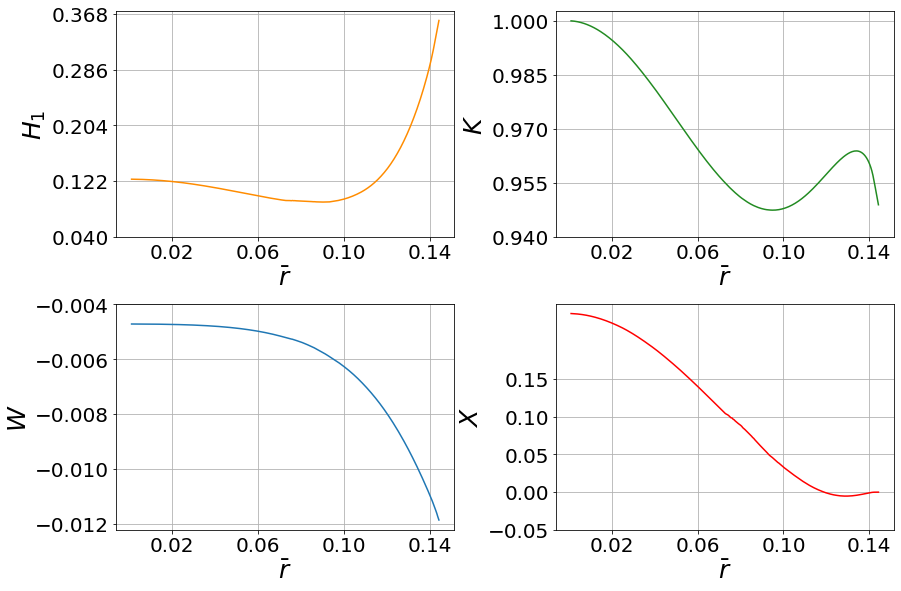

In [7]:
r_total = [*rin, *rout[::-1]]
H1_total = [*H1in, *H1out[::-1]]
K_total = [*Kin, *Kout[::-1]]
W_total = [*Win, *Wout[::-1]]
X_total = [*Xin, *Xout[::-1]]

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(r_total, H1_total, color = "darkorange")
plt.xlabel(r"$\bar{r}$", fontsize=25)
plt.ylabel(r"$H_{1}$", fontsize=25)
plt.xticks(fontsize=20, ticks=np.arange(0.02, 0.165, 0.04))
plt.yticks(fontsize=20, ticks=np.arange(0.04, 0.4, 0.082))
plt.grid()

plt.subplot(2,2,2)
plt.plot(r_total, K_total, color = "forestgreen")
plt.xlabel(r"$\bar{r}$", fontsize=25)
plt.ylabel(r"$K$", fontsize=25)
plt.xticks(fontsize=20, ticks=np.arange(0.02, 0.165, 0.04))
plt.yticks(fontsize=20, ticks=np.arange(0.94, 1, 0.015))
plt.grid()

plt.subplot(2,2,3)
plt.plot(r_total, W_total)
plt.xlabel(r"$\bar{r}$", fontsize=25)
plt.ylabel(r"$W$", fontsize=25)
plt.xticks(fontsize=20, ticks=np.arange(0.02, 0.165, 0.04))
plt.yticks(fontsize=20, ticks=np.arange(-0.012, -0.0035, 0.002))
plt.grid()

plt.subplot(2,2,4)
plt.plot(r_total, X_total, color = "red")
plt.xlabel(r"$\bar{r}$", fontsize=25)
plt.ylabel(r"$X$", fontsize=25)
plt.xticks(fontsize=20, ticks=np.arange(0.02, 0.165, 0.04))
plt.yticks(fontsize=20, ticks=np.arange(-0.05, 0.176, 0.05))
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1, wspace=0.3, hspace=0.3)

#plt.savefig("H1KWX.pdf")
#plt.savefig('H1KWX.pdf', bbox_inches='tight')

plt.show()